In [1]:
# H0 = Therse is no difference between avg house prices in different distances from CBD. 
# H1 = The avg house price in closer distances from CBD is higher that further distances from CBD. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time, json, os, csv
import scipy.stats as st

from scipy.stats import linregress
from citipy import citipy
from pprint import pprint

# Hi Markers, please use your onw API keys to run the script, thank you!
#from api_keys import weather_api_key
#from api_keys import g_key

In [3]:
# Define function to set data type
def set_integer(data_types, pddf):
    for row in data_types:
        pddf[row] = pddf[row].astype(int)

# integer = int

In [4]:
# Read data files
house_data_path = "data_source/Melbourne_housing_FULL.csv"
school_data_path = "data_source/dv309_schoollocations2021.csv"
crime_rate_path = "data_source/Data_Tables_LGA_Criminal_Incidents_Year_Ending_March_2021.xlsx"

house_data = pd.read_csv(house_data_path)
school_data = pd.read_csv(school_data_path, encoding = "cp1252")
crime_data = df = pd.read_excel (crime_rate_path, sheet_name = "Table 03")

# Set output file path
house_file = "data_source/cleaned_source_data/house_cleaned.csv"
school_file = "data_source/cleaned_source_data/school_cleaned.csv"
crime_file = "data_source/cleaned_source_data/crime_cleaned.csv"

In [5]:
house_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,Building Area,Year Built,Council Area,Lattitude,Longtitude,Regionname,Property count
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
# cleaning house data
house_data_cleaned = house_data.dropna(subset = ["Price"])
house_data_cleaned = house_data_cleaned.drop(["Bedroom2"], axis = "columns")
house_data_cleaned = house_data_cleaned.fillna(0)

# Set up a list for data type
# column_list = ["Postcode",
#                "Bathroom",
#                "Car",
#                "Landsize",
#                "BuildingArea",
#                "YearBuilt",
#                "Propertycount",
#                "Rooms"]

# set_integer(column_list, house_data_cleaned)

#house_data_cleaned["Price"] = house_data_cleaned.apply(lambda x: "{:,.0f}".format(x["Price"]), axis = 1)

In [7]:
house_data_cleaned.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,Building Area,Year Built,Council Area,Lattitude,Longtitude,Regionname,Property count
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,0.0,0.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,2.0,1.0,94.0,0.0,0.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [8]:
number_house_in_each_suburb= house_data_cleaned["Suburb"].value_counts()
number_house_in_each_suburb

Reservoir          727
Bentleigh East     493
Richmond           439
Preston            415
Brunswick          387
                  ... 
croydon              1
Tecoma               1
Cranbourne East      1
Yarra Glen           1
Kalkallo             1
Name: Suburb, Length: 345, dtype: int64

In [9]:
df = house_data_cleaned[['Suburb','Type','Price','Distance']].groupby(['Suburb']).mean()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.head()

,Price,Distance
Suburb,,
Abbotsford,1033549.02,2.70
Aberfeldie,1307192.86,8.30
Airport West,751364.25,11.90
Albanvale,536055.56,14.00
Albert Park,1927650.54,3.18


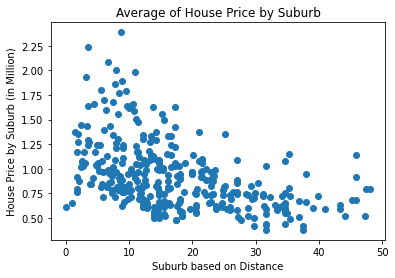

The correlation coefficient between Average of House Price and Average of Distance from CBD is -0.46


<Figure size 432x288 with 0 Axes>

In [10]:
x= df["Distance"]
y= df["Price"]/1000000
plt.scatter(x,y)
plt.title("Average of House Price by Suburb")
plt.xlabel("Suburb based on Distance")
plt.ylabel("House Price by Suburb (in Million)")
plt.show()
print(f"The correlation coefficient between Average of House Price and Average of Distance from CBD is {round(st.pearsonr(x,y)[0],2)}")

file = os.path.join("Images/Suburb_Price_bar.png")
plt.savefig(file)

In [11]:
#Analysis: Due to huge volume of data in the cleanDataset, making conclusion from its plot is impossible and we need to do analysis based on some samples. 
#But the correlation coefficient between house price and distance from CBD is -0.46 that shows a weak negative relationship between these values.

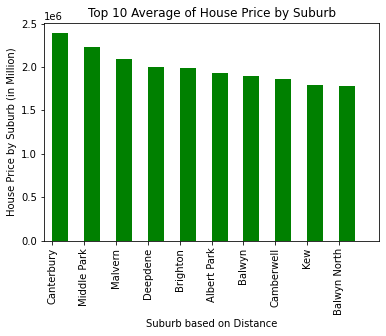

In [12]:
top_ten_df= df.sort_values(by="Price", ascending=False).head(10)

x2= top_ten_df["Distance"]
y2= top_ten_df["Price"]/1000000

ax= top_ten_df.plot(kind='bar',width=1, align="edge", title="Top 10 Average of House Price by Suburb", facecolor="green", legend=False)
ax.set_xlabel("Suburb based on Distance")
ax.set_ylabel("House Price by Suburb (in Million)")
file = os.path.join("Images/top10_Suburb_Price_bar.png")
plt.savefig(file)

In [13]:
#Analysis: We took 10 Suburbs with the highest amount of average house price in Melbourne and can be seen a downward trend in the relationship between their average price and distance from CBD. 

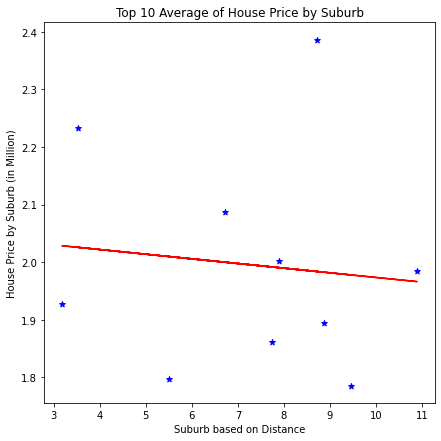

The regression line is: y = -0.01x + 2.05
The correlation coefficient between top10 Average of House Price and Average of Distance from CBD is -0.11, pvalue is 0.7712149196104119


In [14]:
(slope, intercept, rvalue, pvalue, std_err) = linregress(x2, y2)

line = slope * x2 + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(x2, y2, marker='*', facecolors="blue", edgecolors="blue")
plt.plot(x2, line, 'r-')
plt.title("Top 10 Average of House Price by Suburb")
plt.xlabel("Suburb based on Distance")
plt.ylabel("House Price by Suburb (in Million)")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")

file = os.path.join("Images/top10_Suburb_Price_scatter.png")
plt.savefig(file)
plt.show()
print(f"The regression line is: {line_eq}")
print(f"The correlation coefficient between top10 Average of House Price and Average of Distance from CBD is {round(st.pearsonr(x2,y2)[0],2)}, pvalue is {pvalue}")


In [15]:
#Analysis: There is a slight negative relationship between the average house price and distance from CBD among top 10 highest house price in different suburbs in Melbourne,
#based on the above red line and the small negative amount of slope(-0.01). 
#Also the correlation coefficient between top 10 house price and distance from CBD is -0.11 which is less than 0.3 and shows a very weak negative relationship between these values.
#In addition, the amount of pvalue(0.77) which is more than 0.05 proves our H0 which means there is no difference between average of house price and distance from CBD in top 10 highest house price in different suburbs.

In [16]:
suburb_price_distance_grouped_df = house_data_cleaned[['Suburb','Type','Price','Distance']].groupby(['Suburb','Type']).mean()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
suburb_price_distance_grouped_df.head()

Price  Distance
Suburb     Type                     
Abbotsford h    1221023.44      2.70
           t    1041500.00      2.58
           u     657109.38      2.73
Aberfeldie h    1578846.94      8.28
           t    1195000.00      8.46

In [17]:
twenty_highest_price= suburb_price_distance_grouped_df.sort_values(by="Price", ascending=False).head(20)
twenty_highest_price.head(20)

,,Price,Distance
Suburb,Type,,
Toorak,h,3392791.67,4.46
East Melbourne,h,2897777.78,1.43
Malvern,h,2868347.22,6.69
Canterbury,h,2858516.39,8.70
Armadale,h,2575845.59,6.30
Brighton,h,2565902.22,10.91
Middle Park,h,2482043.48,3.53
Deepdene,h,2430000.00,7.90
Kew,h,2342376.85,5.51


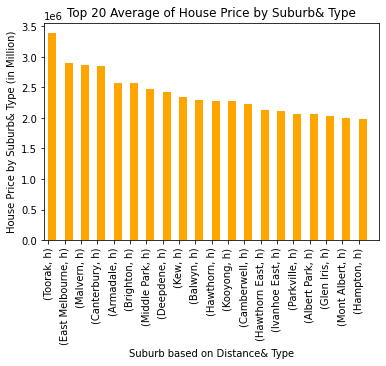

In [18]:
x3= twenty_highest_price["Distance"]
y3= twenty_highest_price["Price"]/1000000

ax= twenty_highest_price.plot(kind='bar',width=1, align="edge", title="Top 20 Average of House Price by Suburb& Type", facecolor="orange", legend=False)
ax.set_xlabel("Suburb based on Distance& Type")
ax.set_ylabel("House Price by Suburb& Type (in Million)")
file = os.path.join("Images/top20_Suburb_Price_Type_bar.png")
plt.savefig(file)

In [19]:
#Analysis: We included the type of Melbourne house from our dataset to our analysis as well. 
#It can be seen that there is a downward trend in the relationship between 20 Suburbs with the highest amount of average house price in Melbourne and their distance from CBD. 
#It is interesting that all types of these 20 houses are from "h" type which means that "House Type" has a stong effect on Melbourne house price.

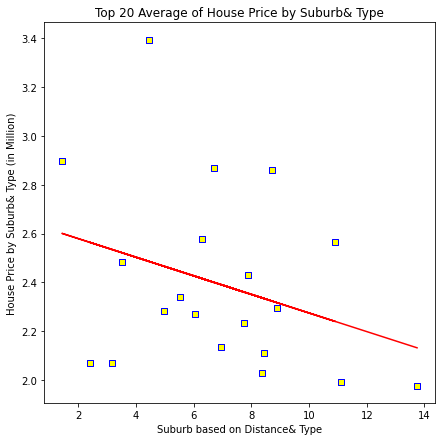

The regression line is: y = -0.04x + 2.66
The correlation coefficient between top20 Average of House Price in different types and Average of Distance from CBD is -0.31, pvalue is 0.17644301310847893


In [20]:
(slope, intercept, rvalue, pvalue, std_err) = linregress(x3, y3)

line = slope * x3 + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(x3, y3, marker='s', facecolors="yellow", edgecolors="blue")
plt.plot(x3, line, 'r-')
plt.title("Top 20 Average of House Price by Suburb& Type")
plt.xlabel("Suburb based on Distance& Type")
plt.ylabel("House Price by Suburb& Type (in Million)")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")

file = os.path.join("Images/top20_Suburb_Price_Type_scatter.png")
plt.savefig(file)
plt.show()
print(f"The regression line is: {line_eq}")
print(f"The correlation coefficient between top20 Average of House Price in different types and Average of Distance from CBD is {round(st.pearsonr(x3,y3)[0],2)}, pvalue is {pvalue}")


In [21]:
#Analysis: There is a negative relationship between the average house price and distance from CBD among top 20 highest house price in different suburbs& types in Melbourne,
#which are grouped by different suburbs and types of houses, based on the above red line and the negative amount of slope(-0.04). 
#In addition, the correlation coefficient between top 20 house in different types and distance from CBD is -0.31 which proves a weak negative relationship between these values.
#Furthermore, the pvalue(0.17) which is a little more than 0.05 proves our H0 which means there is no difference between average of house price and distance from CBD in top 20 highest house price in different suburbs&types.

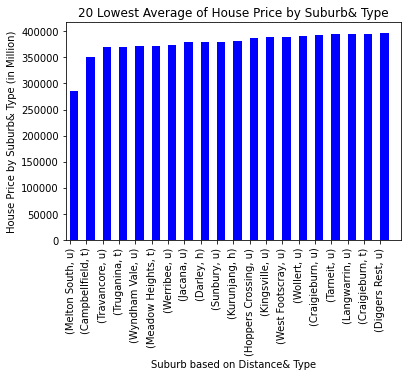

In [22]:
twenty_lowest_price= suburb_price_distance_grouped_df.sort_values(by="Price").head(20)
x4= twenty_lowest_price["Distance"]
y4= twenty_lowest_price["Price"]/1000000

ax= twenty_lowest_price.plot(kind='bar',width=1, align="edge", title="20 Lowest Average of House Price by Suburb& Type", facecolor="blue", legend=False)
ax.set_xlabel("Suburb based on Distance& Type")
ax.set_ylabel("House Price by Suburb& Type (in Million)")
file = os.path.join("Images/low20_Suburb_Price_Type_bar.png")
plt.savefig(file)

In [23]:
#Analysis: For having a more precise analysis on the effect of house type on the Melbourne house price, we considered 20 Suburbs with the lowest amount of average house price in Melbourne and their distance from CBD.  
#It is obvious that there is a upward trend in the relationship between the average house price and their distance from CBD. 
#Besides, it is clear that most types of these 20 houses are from "t" or "u" type which again means that "House Type" has a stong effect on Melbourne house price.

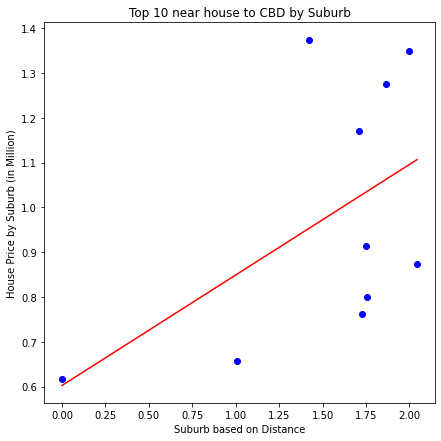

The regression line is: y = 0.25x + 0.6
The correlation coefficient between top10 near House to CBD in different types& Suburbs is 0.53, pvalue is 0.1190609188146324


In [24]:
top_near_distance_df= df.sort_values(by="Distance").head(10)

x5= top_near_distance_df["Distance"]
y5= top_near_distance_df["Price"]/1000000

(slope, intercept, rvalue, pvalue, std_err) = linregress(x5, y5)

line = slope * x5 + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(x5, y5, marker='o', facecolors="blue", edgecolors="blue")
plt.plot(x5, line, 'r-')
plt.title("Top 10 near house to CBD by Suburb")
plt.xlabel("Suburb based on Distance")
plt.ylabel("House Price by Suburb (in Million)")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")

file = os.path.join("Images/top10_near_Suburb_Price_scatter.png")
plt.savefig(file)
plt.show()
print(f"The regression line is: {line_eq}")
print(f"The correlation coefficient between top10 near House to CBD in different types& Suburbs is {round(st.pearsonr(x5,y5)[0],2)}, pvalue is {pvalue}")



In [25]:
#Analysis: There is a strong positive relationship between the average house price and distance from CBD among top 10 near houses to CBD in different Suburbs in Melbourne,
#which is shown based on the above red line and the positive amount of slope(0.25). 
#In addition, the correlation coefficient between top 10 naer house to CBD and average price is 0.53 which proves a moderate positive relationship between these values.
#Furthermore, the pvalue(0.11) which is a little more than 0.05 proves our H0 which means there is no difference between average of house price and distance from CBD in top 10 near houses to CBD in different Suburbs.

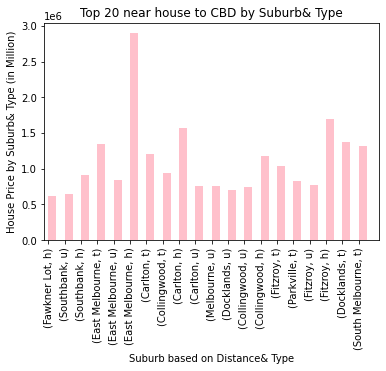

In [26]:
twenty_nearest_price= suburb_price_distance_grouped_df.sort_values(by="Distance").head(20)
x6= twenty_nearest_price["Distance"]
y6= twenty_nearest_price["Price"]/1000000

ax= twenty_nearest_price.plot(kind='bar',width=1, align="edge", title="Top 20 near house to CBD by Suburb& Type", facecolor="pink", legend=False)
ax.set_xlabel("Suburb based on Distance& Type")
ax.set_ylabel("House Price by Suburb& Type (in Million)")
file = os.path.join("Images/top20_nearest_CBD_Suburb_Price_Type_bar.png")
plt.savefig(file)

In [27]:
#Analysis: We can see a weak positive relationship between top 20 near house to CBD in different suburbs& different types and average house price in Melbourne. 

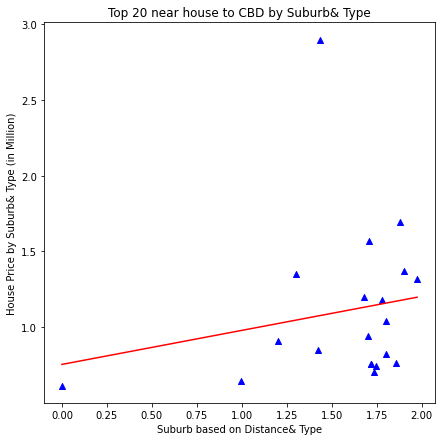

The regression line is:y = 0.22x + 0.76
The correlation coefficient between top20 near House to CBD in different types& Suburbs  is 0.19, pvalue is 0.4218668236118518


In [28]:
(slope, intercept, rvalue, pvalue, std_err) = linregress(x6, y6)

line = slope * x6 + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(x6, y6, marker='^', facecolors="blue", edgecolors="blue")
plt.plot(x6, line, 'r-')
plt.title("Top 20 near house to CBD by Suburb& Type")
plt.xlabel("Suburb based on Distance& Type")
plt.ylabel("House Price by Suburb& Type (in Million)")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")

file = os.path.join("Images/top20_nearest_CBD_Suburb_Price_Type_scatter.png")
plt.savefig(file)
plt.show()
print(f"The regression line is:{line_eq}")
print(f"The correlation coefficient between top20 near House to CBD in different types& Suburbs  is {round(st.pearsonr(x6,y6)[0],2)}, pvalue is {pvalue}")


In [29]:
#Analysis: There is a positive relationship between the average house price and distance from CBD among top 20 near houses to CBD in different suburbs and different house types in Melbourne,
#which is shown based on the above red line and the positive amount of slope(0.22). 
#In addition, the correlation coefficient between top 20 naer house to CBD and average price is 0.19 which proves a weak positive relationship between these values.
#Furthermore, the pvalue(0.42) which is more than 0.05 proves our H0 which means there is no difference between average of house price and distance from CBD in top 20 near houses to CBD in different Suburbs&types.

In [30]:
house_data_cleaned['Year'] = pd.DatetimeIndex(house_data_cleaned['Date']).year
suburb_price_distance_year_grouped_df = house_data_cleaned[['Suburb','Year','Price','Distance']].groupby(['Suburb','Year']).mean()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
suburb_price_distance_year_grouped_df.head(20)

Price  Distance
Suburb       Year                     
Abbotsford   2016  979102.27      2.50
             2017 1074913.46      2.84
             2018 1074333.33      3.00
Aberfeldie   2016 1258272.73      9.10
             2017 1314546.51      7.98
             2018 1459200.00      7.50
Airport West 2016  697718.18     13.50
             2017  782443.76     11.10
             2018  780375.00     10.40
Albanvale    2017  536055.56     14.00
Albert Park  2016 1827685.71      3.30
             2017 2053028.30      3.11
             2018 1298400.00      3.00
Albion       2016  547735.29     13.90
             2017  640328.33     11.80
             2018  626000.00     10.50
Alphington   2016 1264080.00      6.40
             2017 1443758.62      5.94
             2018 1647000.00      5.70
Altona       2016  780480.49     13.80

In [31]:
twenty_nearest_price_year= suburb_price_distance_year_grouped_df.sort_values(by="Distance").head(20)
twenty_nearest_price_year.head(20)

Price  Distance
Suburb          Year                     
Melbourne       2018  788884.62      0.00
Fawkner Lot     2018  616000.00      0.00
Southbank       2018  925812.50      0.70
                2017  559145.83      0.89
Melbourne       2017  866028.99      0.97
Southbank       2016  663185.19      1.20
East Melbourne  2018  700000.00      1.30
                2017 1406250.00      1.36
Docklands       2017  612500.00      1.40
East Melbourne  2016 1380411.76      1.50
Collingwood     2016  889800.00      1.60
Carlton         2018 1350666.67      1.60
Fitzroy         2016 1219926.47      1.60
Carlton         2017 1283186.11      1.66
Parkville       2018 1660000.00      1.80
Carlton         2016 1000071.21      1.80
North Melbourne 2018  939041.67      1.80
Collingwood     2017  907519.61      1.82
North Melbourne 2017  926500.00      1.88
West Melbourne  2016  934529.41      1.90

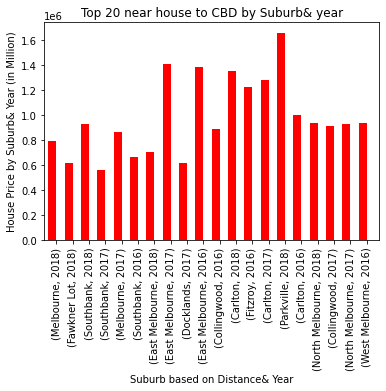

In [32]:
x7= twenty_nearest_price_year["Distance"]
y7= twenty_nearest_price_year["Price"]/1000000

ax= twenty_nearest_price_year.plot(kind='bar',width=1, align="center", title="Top 20 near house to CBD by Suburb& year", facecolor="red", legend=False)
ax.set_xlabel("Suburb based on Distance& Year")
ax.set_ylabel("House Price by Suburb& Year (in Million)")
file = os.path.join("Images/top20_nearest_CBD_Suburb_Price_Year_bar.png")
plt.savefig(file)

In [33]:
#Analysis: It can be seen that there is a positive relationship between top 20 near house to CBD in different suburbs& different years and average house price in Melbourne. 

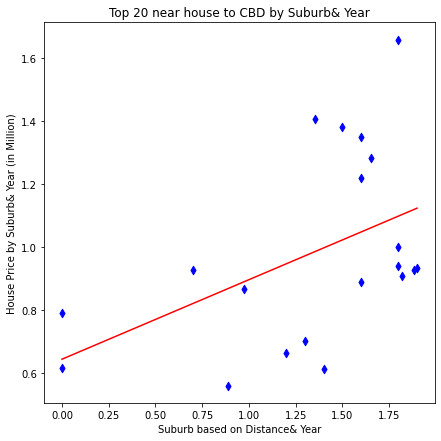

The regression line is: y = 0.25x + 0.64
The correlation coefficient between top20 near House to CBD in different Years& Suburbs  is 0.47, pvalue is 0.03660152499378278 


In [34]:
(slope, intercept, rvalue, pvalue, std_err) = linregress(x7, y7)

line = slope * x7 + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(x7, y7, marker='d', facecolors="blue", edgecolors="blue")
plt.plot(x7, line, 'r-')
plt.title("Top 20 near house to CBD by Suburb& Year")
plt.xlabel("Suburb based on Distance& Year")
plt.ylabel("House Price by Suburb& Year (in Million)")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")

file = os.path.join("Images/top20_nearest_CBD_Suburb_Price_Year_scatter.png")
plt.savefig(file)
plt.show()
print(f"The regression line is: {line_eq}")
print(f"The correlation coefficient between top20 near House to CBD in different Years& Suburbs  is {round(st.pearsonr(x7,y7)[0],2)}, pvalue is {pvalue} ")


In [35]:
#Analysis: There is a positive relationship between the average house price and distance from CBD among top 20 near houses to CBD in different suburbs and in different years in Melbourne,
#which is shown based on the above red line and the positive amount of slope(0.25). 
#In addition, the correlation coefficient between top 20 naer house to CBD and average price is 0.47 which proves a moderate positive relationship between these values.
#Furthermore, the pvalue(0.03) which is less than 0.05 rejects our H0 which means there is a difference between average of house price and distance from CBD in top 20 near houses to CBD in different Suburbs&years.

In [36]:
min_distance= house_data_cleaned["Distance"].min()
max_distance= house_data_cleaned["Distance"].max()
print(f"max distance is: {max_distance}, min distance is: {min_distance} ")

max distance is: 48.1, min distance is: 0.0 


In [37]:
bins = [0, 9.99, 19.99, 29.99, 39.9, 99999]
group_labels = ["0-10", "10-20", "20-30", "30-40", "40+"]
house_data_cleaned["Distance Group"] = pd.cut(house_data_cleaned["Distance"], bins, labels=group_labels)
bins_suburb_price_distance_grouped_df = house_data_cleaned[['Suburb','Distance Group','Price','Distance']].groupby(['Distance Group']).mean()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
bins_suburb_price_distance_grouped_df

,Price,Distance
Distance Group,,
0-10,1170003.67,6.14
10-20,995118.36,13.50
20-30,753728.60,23.27
30-40,629641.51,34.26
40+,649146.07,45.07


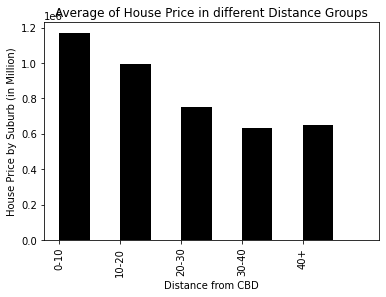

In [38]:
x8= bins_suburb_price_distance_grouped_df["Distance"]
y8= bins_suburb_price_distance_grouped_df["Price"]/1000000

ax= bins_suburb_price_distance_grouped_df.plot(kind='bar',width=1, align="edge", title="Average of House Price in different Distance Groups", facecolor="black", legend=False)
ax.set_xlabel("Distance from CBD")
ax.set_ylabel("House Price by Suburb (in Million)")
file = os.path.join("Images/price_distance_group_bar.png")
plt.savefig(file)

In [39]:
#Analysis: There is a downward trend between Average of House Price in different Distance Groups in Melbourne. 

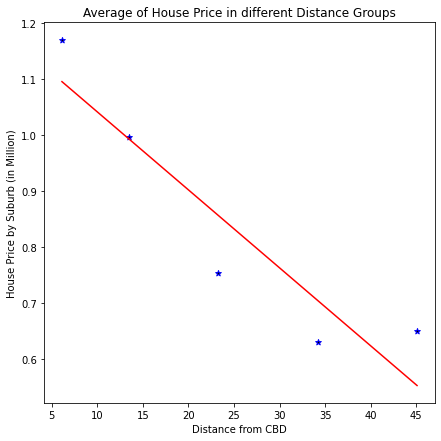

The regression line is: y = -0.01x + 1.18
The correlation coefficient between Average of House Price in different Distance Groups is -0.93, pvalue is 0.023177206064623715 


In [40]:
(slope, intercept, rvalue, pvalue, std_err) = linregress(x8, y8)

line = slope * x8 + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(x8, y8, marker='*', facecolors="black", edgecolors="blue")
plt.plot(x8, line, 'r-')
plt.title("Average of House Price in different Distance Groups")
plt.xlabel("Distance from CBD")
plt.ylabel("House Price by Suburb (in Million)")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")

file = os.path.join("Images/price_distance_group_scatter.png")
plt.savefig(file)
plt.show()
print(f"The regression line is: {line_eq}")
print(f"The correlation coefficient between Average of House Price in different Distance Groups is {round(st.pearsonr(x8,y8)[0],2)}, pvalue is {pvalue} ")


In [41]:
#Analysis: It is clear that there is a negative relationship between the average of house price in different distance groups in Melbourne,
#which is shown based on the above red line and the negative amount of slope(-0.01). 
#In addition, the correlation coefficient between the average of house price in different distance groups is -0.93 which proves a strong positive relationship between these values.
#Furthermore, the pvalue(0.02) which is highly less than 0.05 rejects our H0 which means there is a strong difference between the average of house price in different distance groups in Melbourne.

In [42]:
#Conclusion: 
# Based on the plots, there is a slight negative relationship between the average house price and distance from CBD among different Suburbs in Melbourne.
#This means that with going furthur from CBD, the house price will drop.
#Furthermore, the type of houses, specially the type "h" house, has a vital effect on the average house price among different Suburbs in Melbourne.
#We can conclude that the closer "house" type to the CBD, the higher house price and it proves our first hypothesis. 
#But the amount of pvalue based on all plots were more than 0.05 which proved the H0 (there is not a meaningful difference between house price and distance from CBD as a whole).   

#It was interesting that all plots, correlation coefficient, regression line and pvalue related to different years (2016 to 2018) proved the positive relationship between house price and distance to CBD.
# Which means in these 3 years we had a upward trend in this regard. 

#Also all the aformentioned statistaical analysis approved the negative relationship between the average of house price in different distance groups in Melbourne,
#Which means that generally our H0 of hypothesis(1) is rejected and there is a meaningful relationship between house price in different distance groups from CBD and specially in these 3-year period this trend had been proved.    